<div style="width: 100%; height: 100px; background-color: #DBC7BE; border: 4px solid #0c2461; text-align: center; line-height: 100px; color: #0c2461; font-size: 24px; font-weight: bold; border-radius:6px;">
    Medicare Monthly Enrollment Methodology Analytics Project  🏥
</div>

<div style="width: 100%; background-color: #DBC7BE; color: #0c2461; padding: 10px; border: 3px solid #0c2461; font-size: 15px;margin-bottom: 20px;border-radius:10px;">
    <h3 style="color: #0c2461;">Project Description</h3>
    The Medicare Monthly Enrollment data file presents Medicare monthly and yearly enrollee counts by geographic area (state/territory and county) from calendar year 2013 to calendar year 2022. 
    <span>
    </span>
    <h4 style="color: #0c2461;">The file includes counts for the following:</h4>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><span style="margin-left: -10px;">&#8226;</span> Total Medicare beneficiaries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Original Medicare beneficiaries (i.e. Fee-for-Service)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Medicare Advantage & other health plan beneficiaries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Aged beneficiaries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Disabled beneficiaries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Total Part D (prescription drug) beneficiaries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Stand-Alone Prescription Drug Plan beneficiaries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Medicare Advantage Prescription Drug Plan beneficiaries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Part D Low-income subsidy beneficiaries</li>
    </ul>
The yearly Medicare enrollee counts are determined using a person-year methodology. For each 
calendar year, total person-year counts are determined by summing the total number of months that 
each beneficiary is enrolled during the year and dividing by 12. Using this methodology, a beneficiary’s 
partial-year enrollment may be counted in more than 1 category (i.e., entitlement type, health care 
delivery, plan type, and low-income subsidy eligibility category). 
The monthly counts represent Medicare beneficiaries enrolled in the given month
<span>
</span> 
    <h3 style="color: #0c2461;">Tasks in this notebook</h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><span style="margin-left: -10px;">&#8226;</span> Import libraries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Read dataset and get information from data</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Cleaning Dataset</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Features</li>
        <li>
            <span style="margin-left: -10px;">&#8226;</span> Modeling
            <ul style="list-style-type: none; padding-left: 20px;">
                <li><span style="margin-left: -10px;">&#8226;</span> Logestic Regression</li>
                <li><span style="margin-left: -10px;">&#8226;</span> Complement Naive Bayes (CNB)</li>
                <li><span style="margin-left: -10px;">&#8226;</span> KNN (K-Nearest Neighbors)</li>
                <li><span style="margin-left: -10px;">&#8226;</span> Decision Tree classifier</li>
                <li><span style="margin-left: -10px;">&#8226;</span> Random Forest classifier</li>
            </ul>
        </li>
    </ul>
</div>

<h2 style="position: relative;">
    <span style="color: #0c2461;">Dataset Overview</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #6a89cc;">
</h2>


<h2 style="position: relative;">
    <span style="color: #6a89cc;">1.</span> 
    <span style="color: #0c2461;">Libraries and Warnings</span> 
    <br/>
</h2>

<h2 style="position: relative;">
    <span style="color: #6a89cc;">1.1</span> 
    <span style="color: #0c2461;">Import Libraries</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #6a89cc;">
</h2>

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as plt
from matplotlib import pyplot as pllt
import seaborn as sns

<h2 style="position: relative;">
    <span style="color: #6a89cc;">1.2</span> 
    <span style="color: #0c2461;">Ignore warnings</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #6a89cc;">
</h2>


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

<h2 style="position: relative;">
    <span style="color: #6a89cc;">2.</span> 
    <span style="color: #0c2461;">Read dataset and get information from data</span> 
    <br/>
</h2>


<h2 style="position: relative;">
    <span style="color: #6a89cc;">2.1.</span> 
    <span style="color: #0c2461;">Read Dataset</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #6a89cc;">
</h2>


In [4]:
# Path of the file to read
filepath = "/kaggle/input/medicare-monthly-enrollment-data/Medicare Monthly Enrollment Data_August 2023.csv"
data=pd.read_csv(filepath,index_col="YEAR", parse_dates=True, encoding='Windows-1252')

In [5]:
data.head(3)

,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
YEAR,,,,,,,,,,,,,,,,,,,,,
2013-01-01,Year,National,US,National,Total,,52425659,37613096,14812563,43761388,...,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
2013-01-01,Year,State,AL,Alabama,Total,01,921477.0,711448.0,210029.0,698720.0,...,857619.0,647647.0,209972.0,637247.0,437749.0,199498.0,205496.0,32790.0,11452.0,387510.0
2013-01-01,Year,County,AL,Alabama,Autauga,01001,9323.0,6484.0,2840.0,7088.0,...,8708.0,5868.0,2840.0,6036.0,3268.0,2767.0,1839.0,296.0,105.0,3796.0


<h2 style="position: relative;">
    <span style="color: #6a89cc;">2.2.</span> 
    <span style="color: #0c2461;">information about Datasets</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #6a89cc;">
</h2>

In [6]:
row, col = data.shape
print("The Dataset have",row,"rows and",col,"columns.")

The Dataset have 460290 rows and 25 columns.


In [7]:
#Check the structure of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 460290 entries, 2013-01-01 to 2023-01-01
Data columns (total 25 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   MONTH                                         460290 non-null  object
 1   BENE_GEO_LVL                                  460290 non-null  object
 2   BENE_STATE_ABRVTN                             460290 non-null  object
 3   BENE_STATE_DESC                               460290 non-null  object
 4   BENE_COUNTY_DESC                              460290 non-null  object
 5   BENE_FIPS_CD                                  460290 non-null  object
 6   TOT_BENES                                     460290 non-null  object
 7   ORGNL_MDCR_BENES                              460290 non-null  object
 8   MA_AND_OTH_BENES                              460290 non-null  object
 9   AGED_TOT_BENES                             

In [8]:
data.describe(include = "object")

,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
count,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,...,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290
unique,13,3,59,59,1931,3338,79910,64457,50211,74222,...,76732,60221,50152,68994,52106,47287,34782,11266,6931,59910
top,January,County,TX,Texas,Total,,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*
freq,36690,452148,35328,35328,8004,276,7518,15439,15439,10483,...,7544,15444,15444,7656,22727,22727,9675,85130,85130,9675


<h3 style="color: #0c2461;">Observations</h3>
<h5 style="color: #0c2461;">Most of the columns have object datatype. Conversion is required from object type to Integer for all columns which have counts of beneficiaries.</h5>

<h3 style="color: #0c2461;">Few more observations</h3>
<h5 style="color: #0c2461;">The columns have values like "*". This should be replaced by 0. Conversion is required from object type to Integer for all columns which have counts of beneficiaries.</h5>

In [9]:
# get all the unique values in the 'TOT_BENS' column
Total_ben = data['TOT_BENES'].unique()

# sort them alphabetically and then take a closer look
Total_ben.sort()
Total_ben

array(['*', '0.0', '100.0', ..., '99994.0', '99995.0', '99997.0'],
      dtype=object)

In [10]:
data["TOT_BENES"].isin(["*"]).sum()

7518

In [11]:
data["DSBLD_TOT_BENES"].isin(["*"]).sum()

10483

In [12]:
data["ORGNL_MDCR_BENES"].isin(["*"]).sum()

15439

In [13]:
data["AGED_TOT_BENES"].isin(["*"]).sum()

10483

In [14]:
data["MA_AND_OTH_BENES"].isin(["*"]).sum()

15439

In [15]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[0:26]

MONTH                                           0
BENE_GEO_LVL                                    0
BENE_STATE_ABRVTN                               0
BENE_STATE_DESC                                 0
BENE_COUNTY_DESC                                0
BENE_FIPS_CD                                    0
TOT_BENES                                       0
ORGNL_MDCR_BENES                                0
MA_AND_OTH_BENES                                0
AGED_TOT_BENES                                  0
AGED_ESRD_BENES                                 0
AGED_NO_ESRD_BENES                              0
DSBLD_TOT_BENES                                 0
DSBLD_ESRD_AND_ESRD_ONLY_BENES                  0
DSBLD_NO_ESRD_BENES                             0
A_B_TOT_BENES                                   0
A_B_ORGNL_MDCR_BENES                            0
A_B_MA_AND_OTH_BENES                            0
PRSCRPTN_DRUG_TOT_BENES                         0
PRSCRPTN_DRUG_PDP_BENES                         0


<h3 style="color: #0c2461;">Observations</h3>
<h5 style="color: #0c2461;">No missing values in the dataset.</h5>

<h2 style="position: relative;">
    <span style="color: #6a89cc;">3.</span> 
    <span style="color: #0c2461;">Cleaning the Dataset</span> 
    <br/>
</h2>


In [16]:
data['TOT_BENES'] = pd.to_numeric(data['TOT_BENES'], errors='coerce').fillna(0).astype(int) 
data['DSBLD_TOT_BENES'] = pd.to_numeric(data['DSBLD_TOT_BENES'], errors='coerce').fillna(0).astype(int) 
data['AGED_TOT_BENES'] = pd.to_numeric(data['AGED_TOT_BENES'], errors='coerce').fillna(0).astype(int) 
data['ORGNL_MDCR_BENES'] = pd.to_numeric(data['ORGNL_MDCR_BENES'], errors='coerce').fillna(0).astype(int) 
data['MA_AND_OTH_BENES'] = pd.to_numeric(data['MA_AND_OTH_BENES'], errors='coerce').fillna(0).astype(int) 

In [17]:
## remove all the rows that contain a missing value
#nfl_data.dropna()
#df.replace('*', pd.NA, inplace=True)

In [18]:
#Check the structure of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 460290 entries, 2013-01-01 to 2023-01-01
Data columns (total 25 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   MONTH                                         460290 non-null  object
 1   BENE_GEO_LVL                                  460290 non-null  object
 2   BENE_STATE_ABRVTN                             460290 non-null  object
 3   BENE_STATE_DESC                               460290 non-null  object
 4   BENE_COUNTY_DESC                              460290 non-null  object
 5   BENE_FIPS_CD                                  460290 non-null  object
 6   TOT_BENES                                     460290 non-null  int64 
 7   ORGNL_MDCR_BENES                              460290 non-null  int64 
 8   MA_AND_OTH_BENES                              460290 non-null  int64 
 9   AGED_TOT_BENES                             

<h3 style="color: #0c2461;">Observations</h3>
<h5 style="color: #0c2461;">Conversion done for the specified columns from object type to Integer.</h5>

In [19]:
# get all the unique values in the 'TOT_BENS' column
Total_ben = data['TOT_BENES'].unique()

# sort them alphabetically and then take a closer look
Total_ben.sort()
Total_ben

array([       0,       11,       12, ..., 66180745, 66261300, 66338178])

In [20]:
data["TOT_BENES"].isin(["*"]).sum()

0

In [21]:
data["ORGNL_MDCR_BENES"].isin(["*"]).sum()

0

In [22]:
print(data.columns)

Index(['MONTH', 'BENE_GEO_LVL', 'BENE_STATE_ABRVTN', 'BENE_STATE_DESC',
       'BENE_COUNTY_DESC', 'BENE_FIPS_CD', 'TOT_BENES', 'ORGNL_MDCR_BENES',
       'MA_AND_OTH_BENES', 'AGED_TOT_BENES', 'AGED_ESRD_BENES',
       'AGED_NO_ESRD_BENES', 'DSBLD_TOT_BENES',
       'DSBLD_ESRD_AND_ESRD_ONLY_BENES', 'DSBLD_NO_ESRD_BENES',
       'A_B_TOT_BENES', 'A_B_ORGNL_MDCR_BENES', 'A_B_MA_AND_OTH_BENES',
       'PRSCRPTN_DRUG_TOT_BENES', 'PRSCRPTN_DRUG_PDP_BENES',
       'PRSCRPTN_DRUG_MAPD_BENES',
       'PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES',
       'PRSCRPTN_DRUG_FULL_LIS_BENES', 'PRSCRPTN_DRUG_PARTIAL_LIS_BENES',
       'PRSCRPTN_DRUG_NO_LIS_BENES'],
      dtype='object')


In [23]:
df1 = data[data['BENE_COUNTY_DESC'] == "Total"]
df2 = df1[df1['MONTH'] == "Year"]
df3 = df2[df2['BENE_STATE_DESC'] == "National"]

In [24]:
row, col = df3.shape
print("The Dataset have",row,"rows and",col,"columns.")

The Dataset have 10 rows and 25 columns.


In [25]:
df3.head(10)

,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
YEAR,,,,,,,,,,,,,,,,,,,,,
2013-01-01,Year,National,US,National,Total,,52425659,37613096,14812563,43761388,...,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
2014-01-01,Year,National,US,National,Total,,54013038,37790373,16222665,45216665,...,49073941,32876249,16197692,37720840,23437148,14283691,10313537,1051834.0,401548.0,25953921
2015-01-01,Year,National,US,National,Total,,55496222,38025274,17470948,46630952,...,50414746,32969578,17445168,39505335,24092868,15412467,10643165,1077947.0,406304.0,27377918
2016-01-01,Year,National,US,National,Total,,56981183,38610384,18370800,48143217,...,51743591,33393261,18350330,41203627,24831079,16372548,10915488,1086468.0,413970.0,28787701
2017-01-01,Year,National,US,National,Total,,58457244,38667830,19789414,49678033,...,53008234,33242085,19766149,42728443,25243684,17484759,10856130,1014289.0,383811.0,30474213
2018-01-01,Year,National,US,National,Total,,59989883,38665082,21324800,51303898,...,54349822,33052639,21297184,44249461,25563945,18685516,11374106,1103901.0,406367.0,31365087
2019-01-01,Year,National,US,National,Total,,61514510,38577012,22937498,52991455,...,55653848,32758741,22895108,45827091,25583137,20243954,11555190,1094264.0,410245.0,32767391
2020-01-01,Year,National,US,National,Total,,62840267,37776345,25063922,54531919,...,56966865,31934411,25032454,47413121,25171949,22241173,11655477,1112043.0,371211.0,34274390
2021-01-01,Year,National,US,National,Total,,63892626,36356380,27536246,55851321,...,58041288,30537829,27503460,48818849,24164736,24654113,11711263,1108918.0,323250.0,35675418


In [26]:
numerical_columns = list(df3.loc[:,['TOT_BENES', 'AGED_TOT_BENES', 'DSBLD_TOT_BENES']])

In [27]:
df_numerical = df3[numerical_columns]

In [28]:
import plotly.graph_objs as go
go.Figure(
    data=[go.Histogram(x=df_numerical["TOT_BENES"], xbins={"start": 10000000, "end": 90000000, "size": 500000})],
    layout=go.Layout(title="Histogram of Total Beneficiaries", yaxis={"title": "Count"}, bargap=0.05),
    )

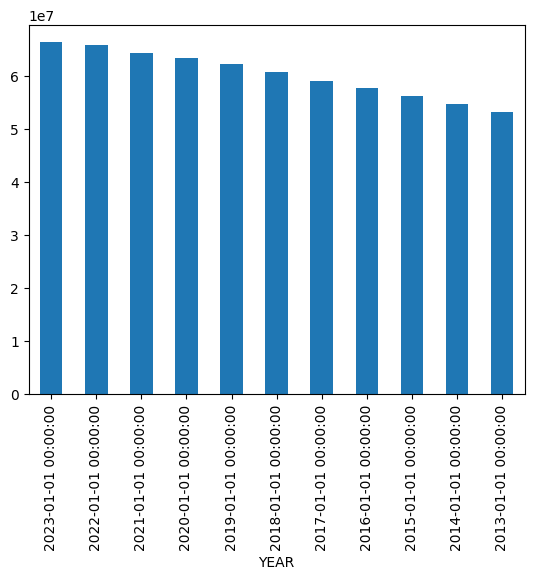

In [29]:
import matplotlib.pyplot as plt
data.groupby('YEAR')['TOT_BENES'].max().sort_values(ascending=False).plot(kind='bar')
plt.xlabel='YEAR'
plt.ylabel='Beneficiaries'
plt.show()

<Axes: xlabel='YEAR'>

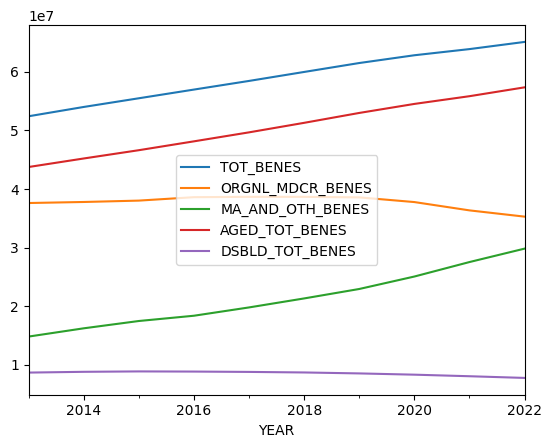

In [30]:
df3.plot(kind='line')

In [31]:
df3.groupby('YEAR')['TOT_BENES'].sum()


YEAR
2013-01-01    52425659
2014-01-01    54013038
2015-01-01    55496222
2016-01-01    56981183
2017-01-01    58457244
2018-01-01    59989883
2019-01-01    61514510
2020-01-01    62840267
2021-01-01    63892626
2022-01-01    65116503
Name: TOT_BENES, dtype: int64